In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd My Drive
%cd dssm_lstm

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive
/gdrive/My Drive
/gdrive/My Drive/dssm_lstm


In [0]:
data = pd.read_csv('word_dataset.csv')
print(data)

data = data[0:798]
print(data)

          words  class   id         0  ...       296       297       298       299
0        people  0,1,2    0  0.263672  ...  0.021118 -0.066895  0.207031 -0.138672
1    adaptation  0,4,5    1  0.261719  ... -0.143555  0.102539 -0.006042  0.289062
2         tribe      0    2 -0.082031  ... -0.086914 -0.172852  0.180664  0.009888
3     community    0,5    3 -0.171875  ... -0.088379 -0.153320  0.155273 -0.150391
4         child  0,1,6    4  0.165039  ... -0.045166 -0.006622 -0.154297  0.075684
..          ...    ...  ...       ...  ...       ...       ...       ...       ...
793   tableware      9  793 -0.218750  ...  0.482422 -0.044189  0.378906  0.025391
794         cup      9  794 -0.292969  ... -0.178711 -0.184570 -0.038330  0.291016
795   porcelain      9  795 -0.176758  ...  0.174805  0.310547  0.298828 -0.121582
796     granita      9  796 -0.129883  ...  0.007874 -0.030029  0.201172  0.048828
797      person      0  797  0.125977  ... -0.279297 -0.085938  0.091309  0.251953

[79

In [0]:
data_labels = data['class']
data_words = data['words']
data_id = data['id']
data_embed  = data.drop(labels = ['words','class','id'],axis=1)

print(data_words)
print(data_labels)
print(data_embed)
print(data_id)

0          people
1      adaptation
2           tribe
3       community
4           child
          ...    
793     tableware
794           cup
795     porcelain
796       granita
797        person
Name: words, Length: 798, dtype: object
0      0,1,2
1      0,4,5
2          0
3        0,5
4      0,1,6
       ...  
793        9
794        9
795        9
796        9
797        0
Name: class, Length: 798, dtype: object
            0         1         2  ...       297       298       299
0    0.263672 -0.019165  0.028931  ... -0.066895  0.207031 -0.138672
1    0.261719 -0.080566 -0.208008  ...  0.102539 -0.006042  0.289062
2   -0.082031 -0.159180  0.051270  ... -0.172852  0.180664  0.009888
3   -0.171875 -0.047119  0.016846  ... -0.153320  0.155273 -0.150391
4    0.165039 -0.063965 -0.001785  ... -0.006622 -0.154297  0.075684
..        ...       ...       ...  ...       ...       ...       ...
793 -0.218750  0.029053 -0.048096  ... -0.044189  0.378906  0.025391
794 -0.292969 -0.078125  0.

9          166
0          119
2          106
1           69
8           67
          ... 
0,2,5,7      1
0,1,5,8      1
0,2,9        1
1,6          1
2,5,6        1
Name: class, Length: 69, dtype: int64

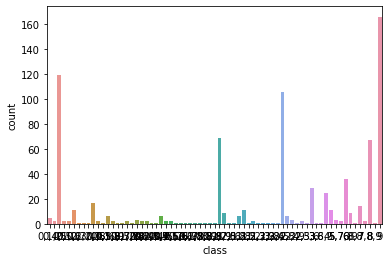

In [0]:
g = sns.countplot(data_labels)

data_labels.value_counts()

In [0]:
#from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import MultiLabelBinarizer
one_hot = MultiLabelBinarizer()
train_labels = one_hot.fit_transform(data['class'].dropna().str.split(',')) 

#train_labels = to_categorical(data_labels, num_classes = 10)
one_hot.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [0]:
from sklearn.model_selection import train_test_split

random_seed = 1
X_train, X_val, Y_train, Y_val = train_test_split(data_id, train_labels, test_size = 0.2, random_state=random_seed)

In [0]:
df = pd.DataFrame(data.drop(labels = ['words','class','id'],axis=1))
print(df)

            0         1         2  ...       297       298       299
0    0.263672 -0.019165  0.028931  ... -0.066895  0.207031 -0.138672
1    0.261719 -0.080566 -0.208008  ...  0.102539 -0.006042  0.289062
2   -0.082031 -0.159180  0.051270  ... -0.172852  0.180664  0.009888
3   -0.171875 -0.047119  0.016846  ... -0.153320  0.155273 -0.150391
4    0.165039 -0.063965 -0.001785  ... -0.006622 -0.154297  0.075684
..        ...       ...       ...  ...       ...       ...       ...
793 -0.218750  0.029053 -0.048096  ... -0.044189  0.378906  0.025391
794 -0.292969 -0.078125  0.023071  ... -0.184570 -0.038330  0.291016
795 -0.176758  0.259766 -0.107422  ...  0.310547  0.298828 -0.121582
796 -0.129883 -0.201172  0.318359  ... -0.030029  0.201172  0.048828
797  0.125977  0.029785  0.008606  ... -0.085938  0.091309  0.251953

[798 rows x 300 columns]


In [0]:
my_dict = data_words.to_dict()
print(my_dict)

dictt = dict()
for i in my_dict:
  dictt[i+1] = my_dict[i]

print(dictt)

{0: 'people', 1: 'adaptation', 2: 'tribe', 3: 'community', 4: 'child', 5: 'smile', 6: 'temple', 7: 'hair', 8: 'forehead', 9: 'hairstyle', 10: 'human', 11: 'black', 12: 'neck', 13: 'youth', 14: 'rural', 15: 'area', 16: 'plant', 17: 'play', 18: 'village', 19: 'school', 20: 'male', 21: 'leg', 22: 'body', 23: 'muscle', 24: 'barechested', 25: 'chest', 26: 'flesh', 27: 'shack', 28: 'hut', 29: 'jungle', 30: 'nature', 31: 'reserve', 32: 'tree', 33: 'rainforest', 34: 'house', 35: 'building', 36: 'event', 37: 'folk', 38: 'dance', 39: 'ritual', 40: 'festival', 41: 'crowd', 42: 'soil', 43: 'tradition', 44: 'moustache', 45: 'facial', 46: 'photography', 47: 'beard', 48: 'tribal', 49: 'chief', 50: 'cuirass', 51: 'viking', 52: 'fictional', 53: 'character', 54: 'art', 55: 'headgear', 56: 'glasses', 57: 'ceremony', 58: 'product', 59: 'fan', 60: 'carnival', 61: 'public', 62: 'fun', 63: 'bunker', 64: 'fortification', 65: 'air', 66: 'raid', 67: 'shelter', 68: 'grass', 69: 'historic', 70: 'site', 71: 'archa

In [0]:
dict2 = dict()
cnt=0
for i, j in df.iterrows(): 
    dict2[cnt] = np.array(j)
    cnt = cnt + 1

In [0]:
dictt2 = dict()
for i in my_dict:
  dictt2[my_dict[i]] = dict2[i]

In [0]:
dictt3 = dict()
for i in my_dict:
  dictt3[my_dict[i]] = i+1

print(dictt3)

{'people': 1, 'adaptation': 2, 'tribe': 3, 'community': 4, 'child': 5, 'smile': 6, 'temple': 7, 'hair': 8, 'forehead': 9, 'hairstyle': 10, 'human': 11, 'black': 12, 'neck': 13, 'youth': 14, 'rural': 15, 'area': 16, 'plant': 17, 'play': 18, 'village': 19, 'school': 20, 'male': 21, 'leg': 22, 'body': 23, 'muscle': 24, 'barechested': 25, 'chest': 26, 'flesh': 27, 'shack': 28, 'hut': 29, 'jungle': 30, 'nature': 31, 'reserve': 32, 'tree': 33, 'rainforest': 34, 'house': 35, 'building': 36, 'event': 37, 'folk': 38, 'dance': 39, 'ritual': 40, 'festival': 41, 'crowd': 42, 'soil': 43, 'tradition': 44, 'moustache': 45, 'facial': 46, 'photography': 47, 'beard': 48, 'tribal': 49, 'chief': 50, 'cuirass': 51, 'viking': 52, 'fictional': 53, 'character': 54, 'art': 55, 'headgear': 56, 'glasses': 57, 'ceremony': 58, 'product': 59, 'fan': 60, 'carnival': 61, 'public': 62, 'fun': 63, 'bunker': 64, 'fortification': 65, 'air': 66, 'raid': 67, 'shelter': 68, 'grass': 69, 'historic': 70, 'site': 71, 'archaeol

In [0]:
index_dict = dictt3
word_vectors = dictt2

In [0]:
print(len(word_vectors))

798


In [0]:
word_vectors['tomatoes']

KeyError: ignored

In [0]:
from keras.layers import Embedding
# assemble the embedding_weights in one numpy array
vocab_dim = 300 # dimensionality of your word vectors
n_symbols = len(index_dict) + 1 # adding 1 to account for 0th index (for masking)
embedding_weights = np.zeros((n_symbols, vocab_dim))
print(embedding_weights.shape)
for word,index in index_dict.items():
    embedding_weights[index, :] = word_vectors[word]

# define inputs here
embedding_layer = Embedding(output_dim=vocab_dim, input_dim=n_symbols, trainable=True)
embedding_layer.build((None,)) # if you don't do this, the next step won't work
embedding_layer.set_weights([embedding_weights])


#embedded = embedding_layer(input_layer)
# ... continue model definition here

(799, 300)


ValueError: ignored

In [0]:
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, Input
from keras.models import Model

sequence_input = Input(shape=(1,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Bidirectional(LSTM(64,  return_sequences=True))(embedded_sequences)
x = Bidirectional(LSTM(32))(x)
x = Dense(64, activation='relu')(x)
preds = Dense(10, activation='sigmoid')(x)

model = Model(sequence_input, preds)

'''model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,), dtype='int32'),
    tf.keras.layers.Embedding(output_dim=vocab_dim, input_dim=n_symbols,trainable=True,mask_zero=True,weights=[embedding_weights]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])'''

"model = tf.keras.Sequential([\n    tf.keras.layers.Input(shape=(1,), dtype='int32'),\n    tf.keras.layers.Embedding(output_dim=vocab_dim, input_dim=n_symbols,trainable=True,mask_zero=True,weights=[embedding_weights]),\n    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),\n    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),\n    tf.keras.layers.Dense(64, activation='relu'),\n    tf.keras.layers.Dropout(0.5),\n    tf.keras.layers.Dense(10, activation='softmax')\n])"

In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1, 300)            239700    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1, 128)            186880    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 472,606
Trainable params: 472,606
Non-trainable params: 0
_____________________________________________________

In [0]:
'''model.get_layer('embedding_12').build((None,)) # if you don't do this, the next step won't work
model.get_layer('embedding_12').set_weights([embedding_weights])'''

"model.get_layer('embedding_12').build((None,)) # if you don't do this, the next step won't work\nmodel.get_layer('embedding_12').set_weights([embedding_weights])"

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)
batch_size = 120

In [0]:
history = model.fit(x = X_train,y = Y_train, epochs=20, validation_data=(X_val,Y_val), validation_steps=10,steps_per_epoch = X_train.shape[0] // batch_size, callbacks=[learning_rate_reduction])



Train on 638 samples, validate on 160 samples
Epoch 1/20
5/5 [==============================] - 4s 824ms/step - loss: 0.6905 - acc: 0.6531 - val_loss: 0.6848 - val_acc: 0.8363
Epoch 2/20
5/5 [==============================] - 0s 32ms/step - loss: 0.6789 - acc: 0.8595 - val_loss: 0.6702 - val_acc: 0.8681
Epoch 3/20
5/5 [==============================] - 0s 32ms/step - loss: 0.6593 - acc: 0.8678 - val_loss: 0.6448 - val_acc: 0.8681
Epoch 4/20
5/5 [==============================] - 0s 35ms/step - loss: 0.6239 - acc: 0.8672 - val_loss: 0.6018 - val_acc: 0.8681
Epoch 5/20
5/5 [==============================] - 0s 40ms/step - loss: 0.5633 - acc: 0.8672 - val_loss: 0.5379 - val_acc: 0.8681

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/20
5/5 [==============================] - 0s 35ms/step - loss: 0.4972 - acc: 0.8672 - val_loss: 0.5015 - val_acc: 0.8681
Epoch 7/20
5/5 [==============================] - 0s 32ms/step - loss: 0.4541 - acc: 0.8672 - va

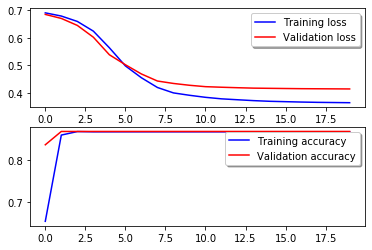

In [0]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label='Training loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation loss', axes = ax[0])
legend = ax[0].legend(loc='best', shadow='true')

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

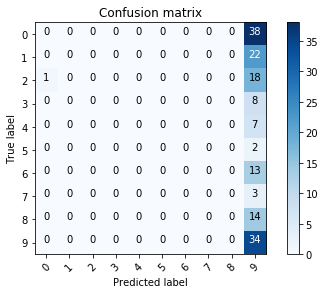

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vector
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [0]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

In [0]:
print(df)

           0         1         2         3   ...   60        61   62   63
0    0.426588  0.314681  0.357214  0.371520  ...  0.0  0.384682  0.0  0.0
1    0.348207  0.250211  0.311075  0.307384  ...  0.0  0.325060  0.0  0.0
2    0.814038  0.617378  0.690885  0.731352  ...  0.0  0.737626  0.0  0.0
3    0.611929  0.434767  0.508110  0.520541  ...  0.0  0.542371  0.0  0.0
4    0.548359  0.417930  0.466664  0.483794  ...  0.0  0.493244  0.0  0.0
..        ...       ...       ...       ...  ...  ...       ...  ...  ...
793  0.914035  0.630219  0.732427  0.786799  ...  0.0  0.790226  0.0  0.0
794  0.965970  0.649190  0.772492  0.830713  ...  0.0  0.833056  0.0  0.0
795  0.909052  0.667348  0.754326  0.784313  ...  0.0  0.812587  0.0  0.0
796  1.018242  0.705292  0.821882  0.888076  ...  0.0  0.888379  0.0  0.0
797  1.288358  0.903988  1.035996  1.102111  ...  0.0  1.109043  0.0  0.0

[798 rows x 64 columns]


In [0]:
from sklearn.metrics.pairwise import cosine_similarity



cnt = 0 
for i in word_vectors:
  dict_words = dict()
  t = []
  a = word_vectors[i].reshape(1,64)
  print(cnt)
  for j in word_vectors:
    b = word_vectors[j].reshape(1,64)
    cos_lib = cosine_similarity(a, b)
    if len(t) <5:
      dict_words[j] = cos_lib[0][0]
      t.append(j)
    else:
      minimum = min(dict_words.keys(), key=(lambda k: dict_words[k]))
      if cos_lib[0][0] > dict_words[minimum]:
        t.remove(minimum)
        del dict_words[minimum]
        dict_words[j] = cos_lib[0][0]
        t.append(j)
  if cnt == 0: 
    similar = pd.DataFrame(t)
    similar = similar.transpose()
  else:
    similar2 = pd.DataFrame(t)
    similar2 = similar2.transpose()
    similar = similar.append(similar2, ignore_index=True)
  cnt = cnt + 1
  




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
similar = similar.transpose()
print(similar)
similar.to_csv('synonyms.csv')

         0           1            2    ...        795        796       797
0     people  adaptation        tribe  ...    garnish  floristry      side
1   vacation       child        black  ...  alcoholic        pan    frozen
2  caribbean    carnival    adventure  ...   stemware     saucer   pumpkin
3       gull        hill  multiplayer  ...   meringue  tableware  beetroot
4       colt        herd       sports  ...  porcelain    granita    person

[5 rows x 798 columns]


In [0]:
print(similar)

         0           1            2    ...        795        796       797
0     people  adaptation        tribe  ...    garnish  floristry      side
1   vacation       child        black  ...  alcoholic        pan    frozen
2  caribbean    carnival    adventure  ...   stemware     saucer   pumpkin
3       gull        hill  multiplayer  ...   meringue  tableware  beetroot
4       colt        herd       sports  ...  porcelain    granita    person

[5 rows x 798 columns]


In [0]:
labels = pd.read_csv('labels.csv',encoding='iso-8859-1')
labels = labels.drop(['ID','score1','score2','score3','score4','score5','score6','score7','score8','score9','score10'],axis=1)
labels.columns=['0','1','2','3','4','5','6','7','8','9']
print(labels)

            0           1           2  ...               7            8          9
0      People  Adaptation       Tribe  ...             NaN          NaN        NaN
1        Hair      People    Forehead  ...      Adaptation       Temple       Neck
2      People   Community  Adaptation  ...            Play      Village     School
3        Male         Leg  Human body  ...             NaN          NaN        NaN
4       Shack         Hut      Jungle  ...      Rural area        House   Building
..        ...         ...         ...  ...             ...          ...        ...
995      Food      Sorbet        Dish  ...  Frozen dessert     Beetroot        NaN
996  Dishware       Plate      Saucer  ...             Cup    Porcelain    Platter
997      Food     Cuisine        Dish  ...          Sorbet    Ice cream     Recipe
998      Meal        Food  Still life  ...          Brunch  Finger food  Serveware
999      Food        Dish     Cuisine  ...             NaN          NaN        NaN

[10

In [0]:
inv_map = {v: k for k, v in index_dict.items()}
print(inv_map)

{1: 'people', 2: 'adaptation', 3: 'tribe', 4: 'community', 5: 'child', 6: 'smile', 7: 'temple', 8: 'hair', 9: 'forehead', 10: 'hairstyle', 11: 'human', 12: 'black', 13: 'neck', 14: 'youth', 15: 'rural', 16: 'area', 17: 'plant', 18: 'play', 19: 'village', 20: 'school', 21: 'male', 22: 'leg', 23: 'body', 24: 'muscle', 25: 'barechested', 26: 'chest', 27: 'flesh', 28: 'shack', 29: 'hut', 30: 'jungle', 31: 'nature', 32: 'reserve', 33: 'tree', 34: 'rainforest', 35: 'house', 36: 'building', 37: 'event', 38: 'folk', 39: 'dance', 40: 'ritual', 41: 'festival', 42: 'crowd', 43: 'soil', 44: 'tradition', 45: 'moustache', 46: 'facial', 47: 'photography', 48: 'beard', 49: 'tribal', 50: 'chief', 51: 'cuirass', 52: 'viking', 53: 'fictional', 54: 'character', 55: 'art', 56: 'headgear', 57: 'glasses', 58: 'ceremony', 59: 'product', 60: 'fan', 61: 'carnival', 62: 'public', 63: 'fun', 64: 'bunker', 65: 'fortification', 66: 'air', 67: 'raid', 68: 'shelter', 69: 'grass', 70: 'historic', 71: 'site', 72: 'arch

In [0]:
similar = similar.transpose()

In [0]:
cnt = 0

for row_index,row in labels.iterrows():
  print(cnt)
  o = [] 
  for i in row:
    for row_indexx,rowx in similar.iterrows():
      if str(inv_map[row_indexx+1]) == str(i).lower():
        for j in rowx:
          o.append(j)
  if cnt == 0: 
    synonyms = pd.DataFrame(o)
    synonyms = synonyms.transpose()
  else:
    synonyms2 = pd.DataFrame(o)
    synonyms2 = synonyms2.transpose()
    synonyms = synonyms.append(synonyms2, ignore_index=True)
  cnt = cnt + 1
  

print(synonyms)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
synonyms.to_csv('synonymsx.csv')

In [0]:
synonyms = synonyms.transpose()

In [0]:
for i in synonyms.columns:
  synonyms[i] = synonyms[i].map(index_dict)

print(synonyms)

      0      1      2      3      4    ...    995  996    997    998    999
0     1.0    8.0    1.0   21.0   28.0  ...   13.0  157   13.0   60.0   13.0
1   119.0  336.0  119.0   56.0  169.0  ...   84.0  636   84.0  105.0   84.0
2   240.0  374.0  240.0  392.0  483.0  ...  172.0  638  172.0  484.0  172.0
3   291.0  384.0  291.0  394.0  711.0  ...  285.0  727  285.0  510.0  285.0
4   548.0  388.0  548.0  606.0  766.0  ...  429.0  791  429.0  640.0  429.0
5     2.0    1.0    4.0   22.0   29.0  ...   14.0  633   85.0   13.0  565.0
6     5.0  119.0   50.0  138.0  318.0  ...   93.0  637  652.0   84.0  604.0
7    61.0  240.0  202.0  488.0  329.0  ...  561.0  648  729.0  172.0  610.0
8   310.0  291.0  208.0  499.0  361.0  ...  736.0  682  732.0  285.0  625.0
9   498.0  548.0  488.0  760.0  793.0  ...  789.0  756  751.0  429.0  632.0
10    3.0    9.0    2.0   24.0   30.0  ...  565.0  752  565.0  752.0   85.0
11   12.0   14.0    5.0  308.0  148.0  ...  604.0  792  604.0  792.0  652.0
12   95.0   

In [0]:
synonyms = synonyms.transpose()
cnt = 0
for row_index,row in synonyms.iterrows():
  o = [] 
  for i in row:
    if i != 8 and i not in o:
      o.append(i)
  o.sort()
  print(o)
  if cnt == 0: 
    synonyms2 = pd.DataFrame(o)
    synonyms2 = synonyms2.transpose()
  else:
    synonyms3 = pd.DataFrame(o)
    synonyms3 = synonyms3.transpose()
    synonyms2 = synonyms2.append(synonyms3, ignore_index=True)
  cnt = cnt + 1
  
print(synonyms2)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 12.0, 15.0, 42.0, 50.0, 61.0, 63.0, 95.0, 119.0, 128.0, 138.0, 148.0, 152.0, 196.0, 202.0, 208.0, 240.0, 291.0, 310.0, 394.0, 463.0, 488.0, 498.0, 530.0, 536.0, 548.0, 561.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[1.0, 2.0, 5.0, 6.0, 7.0, 9.0, 10.0, 11.0, 13.0, 14.0, 15.0, 54.0, 61.0, 88.0, 119.0, 128.0, 148.0, 151.0, 152.0, 170.0, 185.0, 189.0, 240.0, 285.0, 291.0, 310.0, 336.0, 374.0, 384.0, 388.0, 394.0, 418.0, 429.0, 450.0, 460.0, 463.0, 471.0, 482.0, 498.0, 548.0, 552.0, 561.0, nan, nan, nan, nan, nan]
[1.0, 2.0, 4.0, 5.0, 14.0, 17.0, 18.0, 19.0, 20.0, 38.0, 42.0, 50.0, 61.0, 63.0, 75.0, 79.0, 93.0, 119.0, 137.0, 142.0, 165.0, 180.0, 181.0, 202.0, 208.0, 209.0, 211.0, 240.0, 253.0, 284.0, 291.0, 295.0, 310.0, 477.0, 480.0, 488.0, 498.0, 530.0, 536.0, 548.0, 561.0, 568.0, 626.0, nan, nan, nan, nan, nan]
[21.0, 22.0, 24.0, 25.0, 26.0, 27.0, 56.0, 93.0, 138.0, 141.0, 232.0, 251.0, 308.0, 344.0, 379.0, 392.0, 394

In [0]:
synonyms2.to_csv('synonymsxx.csv')

In [0]:
print(synonyms2)

       0     1     2      3      4      5      6   ...  43  44  45  46  47  48  49
0     1.0   2.0   3.0    4.0    5.0    6.0    7.0  ... NaN NaN NaN NaN NaN NaN NaN
1     1.0   2.0   5.0    6.0    7.0    9.0   10.0  ... NaN NaN NaN NaN NaN NaN NaN
2     1.0   2.0   4.0    5.0   14.0   17.0   18.0  ... NaN NaN NaN NaN NaN NaN NaN
3    21.0  22.0  24.0   25.0   26.0   27.0   56.0  ... NaN NaN NaN NaN NaN NaN NaN
4     2.0   5.0  21.0   28.0   29.0   30.0   33.0  ... NaN NaN NaN NaN NaN NaN NaN
..    ...   ...   ...    ...    ...    ...    ...  ...  ..  ..  ..  ..  ..  ..  ..
995  13.0  14.0  28.0   84.0   85.0   93.0  169.0  ... NaN NaN NaN NaN NaN NaN NaN
996  13.0  29.0  84.0  157.0  172.0  285.0  318.0  ... NaN NaN NaN NaN NaN NaN NaN
997  13.0  14.0  28.0   84.0   85.0   93.0  169.0  ... NaN NaN NaN NaN NaN NaN NaN
998  13.0  29.0  60.0   84.0   85.0  105.0  172.0  ... NaN NaN NaN NaN NaN NaN NaN
999  13.0  28.0  84.0   85.0  169.0  172.0  285.0  ... NaN NaN NaN NaN NaN NaN NaN

[10

In [0]:
cnt = 0
for row_index,row in synonyms2.iterrows():
  p = []
  q= []
  for i in row:
    p.append(i)
  for row_index,row in synonyms2.iterrows():
    e = []
    for j in row:
      e.append(j)
    p = [incom for incom in p if str(incom) != 'nan']
    e = [incom for incom in e if str(incom) != 'nan']
    a = len(set(p)&set(e))
    a = a/len(set(p))
    q.append(a)
  print(cnt)
  if cnt == 0: 
    synonyms4 = pd.DataFrame(q)
    synonyms4 = synonyms4.transpose()
  else:
    synonyms5 = pd.DataFrame(q)
    synonyms5 = synonyms5.transpose()
    synonyms4 = synonyms4.append(synonyms5, ignore_index=True)
  cnt = cnt + 1
  

print(synonyms4)  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
synonyms4 = synonyms4*100
print(synonyms4)

            0           1           2    ...         997         998         999
0    100.000000   57.575758   60.606061  ...    3.030303    0.000000    0.000000
1     45.238095  100.000000   28.571429  ...   11.904762    7.142857    7.142857
2     46.511628   27.906977  100.000000  ...    6.976744    0.000000    0.000000
3     10.714286    3.571429    7.142857  ...    7.142857    0.000000    0.000000
4     18.421053   18.421053   13.157895  ...    5.263158   13.157895    5.263158
..          ...         ...         ...  ...         ...         ...         ...
995    2.702703   13.513514    8.108108  ...   81.081081   45.945946   72.972973
996    0.000000    7.500000    0.000000  ...   40.000000   62.500000   32.500000
997    2.702703   13.513514    8.108108  ...  100.000000   54.054054   72.972973
998    0.000000    7.692308    0.000000  ...   51.282051  100.000000   43.589744
999    0.000000   10.344828    0.000000  ...   93.103448   58.620690  100.000000

[1000 rows x 1000 columns]


In [0]:
synonyms4.to_csv('synonyms_corr.csv')

In [0]:
#For feauture vector

intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer('dense_1').output)
intermediate_output = intermediate_layer_model.predict(data_id)

import pandas as pd
print(intermediate_output.shape)
df  = pd.DataFrame(intermediate_output)
print(df)
df.to_csv('CNN.csv')

(798, 64)
           0         1         2         3   ...   60        61   62   63
0    0.426588  0.314681  0.357214  0.371520  ...  0.0  0.384682  0.0  0.0
1    0.348207  0.250211  0.311075  0.307384  ...  0.0  0.325060  0.0  0.0
2    0.814038  0.617378  0.690885  0.731352  ...  0.0  0.737626  0.0  0.0
3    0.611929  0.434767  0.508110  0.520541  ...  0.0  0.542371  0.0  0.0
4    0.548359  0.417930  0.466664  0.483794  ...  0.0  0.493244  0.0  0.0
..        ...       ...       ...       ...  ...  ...       ...  ...  ...
793  0.914035  0.630219  0.732427  0.786799  ...  0.0  0.790226  0.0  0.0
794  0.965970  0.649190  0.772492  0.830713  ...  0.0  0.833056  0.0  0.0
795  0.909052  0.667348  0.754326  0.784313  ...  0.0  0.812587  0.0  0.0
796  1.018242  0.705292  0.821882  0.888076  ...  0.0  0.888379  0.0  0.0
797  1.288358  0.903988  1.035996  1.102111  ...  0.0  1.109043  0.0  0.0

[798 rows x 64 columns]
